In [61]:
import matplotlib.pyplot as plt
import numpy as np
import random

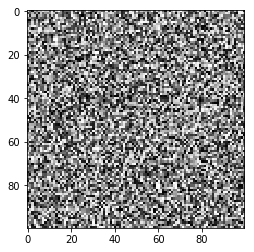

In [62]:
 X = np.random.random((100, 100)) # sample 2D array
plt.imshow(X, cmap="gray")
plt.show()

In [220]:
def create_artboard(rows, cols):
    return np.zeros([rows, cols])

def create_empty_target(rows, cols):
    return np.zeros([rows, cols])

In [260]:
artboard = create_artboard(15, 15)
target = create_empty_target(15, 15)

In [261]:
target = np.array(
    [
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

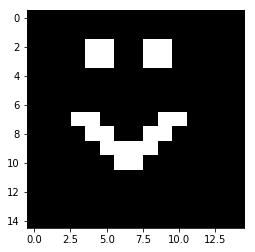

In [262]:
plt.imshow(target, cmap="gray")

In [263]:
def add_random_square(artboard):
    
    neighbor_positions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    rows = len(artboard)
    cols = len(artboard[0])

    ## pick a random cell in the artboard that is not on the border
    random_row = random.randint(1, rows - 2)
    random_col = random.randint(1, cols - 2)

    ## modify all of its neighbors
    for relative_position in neighbor_positions:
        absolute_row = relative_position[0] + random_row
        absolute_col = relative_position[1] + random_col
        if artboard[absolute_row][absolute_col] < 1:
            artboard[absolute_row][absolute_col] += 0.1
    
    return artboard


In [264]:
def score(artboard, target):
    
    score = -1
    
    rows = len(artboard)
    cols = len(artboard[0])
    
    if rows != len(target) or cols != len(target[0]):
        return 'target and artboard are not the same size!'
    
    summed_difference = 0
    
    for i, row in enumerate(artboard):
        for j, col in enumerate(row):
            summed_difference += abs(artboard[i][j] - target[i][j])
    
    score = summed_difference
    
#     BEWARE! little validation was done on this funciton - is this summing the differences as expected?
    
    return score

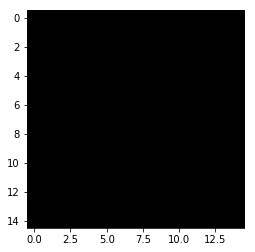

In [265]:
plt.imshow(artboard, cmap="gray")

In [266]:
def draw(artboard, target, iterations):
    """generate a number (iterations) of artboards with random shapes drawn and pick the highest scoring one to keep"""
    
    current_score = score(artboard, target)
    
    for i in range(iterations):
        new_temp_artboard = add_random_square(artboard)
        if score(new_temp_artboard, target) > current_score:
            artboard = new_temp_artboard
    
    return artboard
        

In [267]:
artboard = draw(artboard, target, 100)

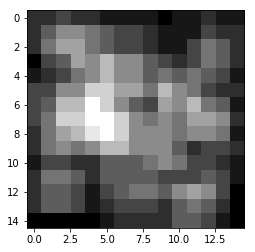

In [268]:
plt.imshow(artboard, cmap="gray")

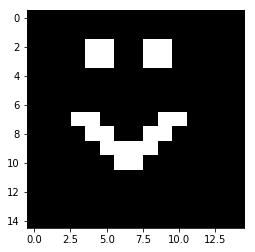

In [269]:
plt.imshow(target, cmap="gray")